In [1]:
import numpy as np
import pandas as pd

1. Tokenize
2. Vector hoá
3. Embedding

# Dữ liệu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/PBL6/dataset/clean_data.csv')
data

,Title,URL,Content,Label
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1
...,...,...,...,...
3882,"Thể chế hóa đầy đủ các chủ trương, đường lối c...",https://vtv.vn//chinh-tri/the-che-hoa-day-du-c...,"Cho ý kiến vào Dự án Luật Thủ đô sửa đổi, tán ...",0
3883,"Hoa Kỳ ủng hộ Việt Nam mạnh, độc lập, tự cường...",https://vtv.vn//chinh-tri/hoa-ky-ung-ho-viet-n...,"Chiều 19/9, theo giờ địa phương, tại trụ sở Vi...",0
3884,Chủ tịch nước Võ Văn Thưởng dự Lễ giới thiệu t...,https://vtv.vn//chinh-tri/chu-tich-nuoc-vo-van...,"Cùng dự, có nguyên Thường trực Ban Bí thư Trần...",0
3885,Phó Chủ tịch nước gặp mặt Đoàn đại biểu người ...,https://vtv.vn//chinh-tri/pho-chu-tich-nuoc-ga...,Bày tỏ xúc động được gặp mặt các đại biểu ngườ...,0


In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Label'])
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Label'])

In [5]:
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(2487, 4)
(622, 4)
(778, 4)


# Tokenize

In [6]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 52.2 MB/s eta 0:00:00


In [7]:
import re
from pyvi import ViTokenizer

In [8]:
with open('/content/drive/MyDrive/PBL6/vietnamese.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()
stopwords[0:3]

['a lô', 'a ha', 'ai']

In [9]:
# xóa số
def delete_number(text):
    return re.sub(r'\d+', ' ', text)
# chuyển chữ hoa thành thường
def lowercase(text):
    return text.lower()
# xóa dấu câu
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
# Xóa ký tự đặc biệt
def remove_special_characters(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()
#Xóa từ dừng
def remove_stopwords(text, stop_word):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_word]
    filtered_text = ' '.join(filtered_words)
    return filtered_text
def preprocess(text, stopwords):
    text = delete_number(text)
    text = lowercase(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text, stopwords)
    return text

In [10]:
def tokenize_text(text):
    return ViTokenizer.tokenize(text)

In [11]:
train_data['Compound_VN_Content'] = train_data['Content'].apply(tokenize_text)
val_data['Compound_VN_Content'] = val_data['Content'].apply(tokenize_text)

In [12]:
train_data['preprocess_SW'] = train_data.apply(lambda row: preprocess(row['Compound_VN_Content'], stopwords), axis=1)
val_data['preprocess_SW'] = val_data.apply(lambda row: preprocess(row['Compound_VN_Content'], stopwords), axis=1)

In [13]:
train_data

,Title,URL,Content,Label,Compound_VN_Content,preprocess_SW
3537,Điện Biên 4 tháng vẫn ghi nhận ca mắc bệnh bạc...,https://tuoitre.vn/dien-bien-4-thang-van-ghi-n...,Cán bộ y tế lấy mẫu xét nghiệm bệnh bạch hầu c...,0,Cán_bộ y_tế lấy mẫu xét_nghiệm bệnh bạch_hầu c...,cán_bộ y_tế mẫu xét_nghiệm bệnh bạch_hầu trẻ ả...
763,Một góc nhìn về ngày Thương binh Liệt sỹ 27/7,https://www.khoi8406.com/post/danlambaovn/mot-...,Từ khi khai sinh ra nước Việt Nam Dân Chủ Cộng...,1,Từ khi khai_sinh ra nước Việt_Nam Dân_Chủ Cộng...,khai_sinh việt_nam dân_chủ cộng_hòa chủ_trương...
2615,Kết quả xổ số hôm nay - KQXS - Xổ số trực tiếp...,https://thanhnien.vn/ket-qua-xo-so-hom-nay-kqx...,BáoThanh Niêncập nhật nhanh nhất kết quả xổ số...,0,BáoThanh Niêncập nhật nhanh nhất kết_quả xổ_số...,báothanh niêncập nhật kết_quả xổ_số kqxs kết_q...
1740,"MÊNH MÔNG THẾ SỰ ĐỂ GIÓ CUỐN ĐI SỐ 66 : ""LỜI N...",https://www.khoi8406.com/post/nhanquyenchovn/m...,Chẳng trách chuyện ông Trọng phải ngồi để khai...,1,Chẳng_trách chuyện ông Trọng phải ngồi để khai...,chẳng_trách trọng khai_mạc_hội nghị trung_ương...
994,"""1984"" CỦA G.ORWELL : 70 NĂM LỜI CÁO BUỘC CHẾ ...",https://www.khoi8406.com/post/nhanquyenchovn/1...,"Bắt đầu chấp bút năm 1948, tiểu thuyết « Câu c...",1,"Bắt_đầu chấp_bút năm 1948 , tiểu_thuyết « Câu_...",bắt_đầu chấp_bút tiểu_thuyết câu_chuyện bối_cả...
...,...,...,...,...,...,...
1591,LÃNH TỤ Ở HÀ NỘI TÍNH TOÁN ĐIỀU GÌ TRONG THẢM ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Khmer Đỏ đánh vào Ba Chúc, An Giang, chiếm giữ...",1,"Khmer Đỏ đánh vào Ba Chúc , An_Giang , chiếm_g...",khmer đỏ đánh chúc an_giang chiếm_giữ khu_vực ...
3499,Title not found,https://tuoitre.vn/10-y-tuong-thiet-ke-vuon-ba...,Chiếc ban công cũ kỹ như bừng sáng với sắc màu...,0,Chiếc ban_công cũ_kỹ như bừng sáng với sắc_màu...,ban_công cũ_kỹ bừng sắc_màu hoa ảnh hgtv kết_h...
2252,"Cụt 2 chân, 1 tay vì vài giây bất cẩn",https://dantri.com.vn/lao-dong-viec-lam/cut-2-...,"Ám ảnh suốt đời\nĐã 5 năm trôi qua, kể từ ngày...",0,"Ám_ảnh suốt_đời \n Đã 5 năm trôi qua , kể từ n...",ám_ảnh suốt_đời trôi tai_nạn lao_động nguyễn_t...
688,Phó Tổng tham mưu trưởng Quân đội Việt cộng bắ...,https://www.khoi8406.com/post/danlambaovn/pho-...,Trong khi quân xâm lược Tàu cộng ngang nhiên x...,1,Trong khi quân xâm_lược Tàu cộng ngang_nhiên x...,quân xâm_lược tàu cộng ngang_nhiên xâm_phạm ch...


In [14]:
val_data

,Title,URL,Content,Label,Compound_VN_Content,preprocess_SW
3837,Nga tăng gấp 10 lần sản lượng khí tài quân sự,https://vtv.vn//the-gioi/nga-tang-gap-10-lan-s...,Đây là thông tin được Giám đốc Công nghiệp của...,0,Đây là thông_tin được Giám_đốc Công_nghiệp của...,thông_tin giám_đốc công_nghiệp tổ_hợp vũ_khí đ...
599,BIỂN ĐÔNG: PHÉP THỬ Ý ĐẢNG LÒNG DÂN (Nguyễn An...,https://www.khoi8406.com/post/nhanquyenchovn/b...,Nếu đụng độ giữa Việt Nam và Trung Quốc trên b...,1,Nếu đụng_độ giữa Việt_Nam và Trung_Quốc trên b...,đụng_độ việt_nam trung_quốc biển dừng va_chạm ...
2268,HLV Bandovic chia sẻ về nguyên nhân Hà Nội FC ...,https://dantri.com.vn/the-thao/hlv-bandovic-ch...,Có lợi thế sân nhà Mỹ Đình và dùng toàn bộ 6 n...,0,Có lợi_thế sân_nhà Mỹ_Đình và dùng toàn_bộ 6 n...,lợi_thế sân_nhà mỹ_đình toàn_bộ ngoại binh hà_...
2285,HLV Hoàng Anh Tuấn mơ về kỳ tích Thường Châu n...,https://dantri.com.vn/the-thao/hlv-hoang-anh-t...,"Thậm chí, ông Tuấn còn mơ về kỳ tích Thường Ch...",0,"Thậm_chí , ông Tuấn còn mơ về kỳ_tích Thường_C...",thậm_chí tuấn mơ kỳ_tích thường_châu đội u việ...
620,BIỆN PHÁP CƠ BẢN : LẬP QUYỀN DÂN (Nguyễn Đình ...,https://www.khoi8406.com/post/nhanquyenchovn/b...,"Ngày 4-8-2019, Nhị Lê có trả lời phỏng vấn trê...",1,"Ngày 4 - 8 - 2019 , Nhị Lê có trả_lời phỏng_vấ...",nhị lê trả_lời phỏng_vấn báo tiền_phong phát_b...
...,...,...,...,...,...,...
1993,Tỷ lệ xe điện bị cháy có cao hơn xe xăng không...,https://dantri.com.vn/o-to-xe-may/ty-le-xe-die...,Hầu như ai cũng biết rằngxe điệnkhác xe xăng r...,0,Hầu_như_ai cũng biết rằngxe điệnkhác xe xăng r...,hầu_như_ai rằngxe điệnkhác xe xăng nhầm phương...
1151,CUỘC THI NÓI DỐI (Phạm Đình Trọng),https://www.khoi8406.com/post/nhanquyenchovn/c...,Khi đứng đầu đảng bộ cộng sản ở thành phố có s...,1,Khi đứng đầu đảng_bộ cộng_sản ở thành_phố có s...,đứng đầu đảng_bộ cộng_sản thành_phố sức_mạnh k...
738,ĐÈN XANH VỚI CHẢ ĐÈN ĐỎ (Phạm Đoan Trang),https://www.khoi8406.com/post/nhanquyenchovn/e...,Hồi tàu hải giám Trung Quốc cắt cáp tàu Bình M...,1,Hồi tàu hải giám Trung_Quốc cắt cáp tàu Bình_M...,hồi tàu hải giám trung_quốc cắt cáp tàu bình_m...
3753,Toàn bộ học sinh thôn Nam Yên đã đi học ở trườ...,https://vtv.vn//giao-duc/toan-bo-hoc-sinh-thon...,Liên quan đến việc vẫn còn hơn 50 học sinh ở t...,0,Liên_quan đến việc vẫn còn hơn 50 học_sinh ở t...,liên_quan học_sinh thôn nam_yên xã hoà_bắc huy...


# Vector hoá

In [15]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.5 MB/s eta 0:00:00


In [16]:
from transformers import AutoTokenizer, AutoModel
import torch

In [17]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = AutoModel.from_pretrained("vinai/phobert-base")

In [21]:
def generate_sentence_embedding(text):
    # Tokenize the text
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=256, truncation=True, padding='max_length')

    # Convert input_ids to a PyTorch tensor
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

    # Generate the embedding
    with torch.no_grad():
        outputs = model(input_ids)
        embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

    return embedding

In [22]:
train_data['Content_embedding'] = train_data['preprocess_SW'].apply(lambda content : generate_sentence_embedding(content))
val_data['Content_embedding'] = val_data['preprocess_SW'].apply(lambda content : generate_sentence_embedding(content))

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [23]:
train_data.head(5)

,Title,URL,Content,Label,Compound_VN_Content,preprocess_SW,Content_embedding
3537,Điện Biên 4 tháng vẫn ghi nhận ca mắc bệnh bạc...,https://tuoitre.vn/dien-bien-4-thang-van-ghi-n...,Cán bộ y tế lấy mẫu xét nghiệm bệnh bạch hầu c...,0,Cán_bộ y_tế lấy mẫu xét_nghiệm bệnh bạch_hầu c...,cán_bộ y_tế mẫu xét_nghiệm bệnh bạch_hầu trẻ ả...,"[-0.10239891, 0.30345044, -0.105971925, -0.117..."
763,Một góc nhìn về ngày Thương binh Liệt sỹ 27/7,https://www.khoi8406.com/post/danlambaovn/mot-...,Từ khi khai sinh ra nước Việt Nam Dân Chủ Cộng...,1,Từ khi khai_sinh ra nước Việt_Nam Dân_Chủ Cộng...,khai_sinh việt_nam dân_chủ cộng_hòa chủ_trương...,"[-0.038202997, 0.289941, -0.33035824, 0.248263..."
2615,Kết quả xổ số hôm nay - KQXS - Xổ số trực tiếp...,https://thanhnien.vn/ket-qua-xo-so-hom-nay-kqx...,BáoThanh Niêncập nhật nhanh nhất kết quả xổ số...,0,BáoThanh Niêncập nhật nhanh nhất kết_quả xổ_số...,báothanh niêncập nhật kết_quả xổ_số kqxs kết_q...,"[-0.36208132, 0.06732351, -0.4814821, 0.433014..."
1740,"MÊNH MÔNG THẾ SỰ ĐỂ GIÓ CUỐN ĐI SỐ 66 : ""LỜI N...",https://www.khoi8406.com/post/nhanquyenchovn/m...,Chẳng trách chuyện ông Trọng phải ngồi để khai...,1,Chẳng_trách chuyện ông Trọng phải ngồi để khai...,chẳng_trách trọng khai_mạc_hội nghị trung_ương...,"[-0.12279474, 0.43342686, -0.3750214, -0.01576..."
994,"""1984"" CỦA G.ORWELL : 70 NĂM LỜI CÁO BUỘC CHẾ ...",https://www.khoi8406.com/post/nhanquyenchovn/1...,"Bắt đầu chấp bút năm 1948, tiểu thuyết « Câu c...",1,"Bắt_đầu chấp_bút năm 1948 , tiểu_thuyết « Câu_...",bắt_đầu chấp_bút tiểu_thuyết câu_chuyện bối_cả...,"[-0.019751584, 0.2792466, -0.3333709, -0.06513..."


Kiem tra cau co do dai vecto lon nhat

In [24]:
# max_len = 0
# for i in range (len(word_vector_train)):
#   elem = np.count_nonzero(word_vector_train[i])
#   if(elem > max_len): max_len = elem
# max_len

# Embedding

# Model

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, MaxPooling1D, Input, BatchNormalization, GlobalMaxPooling1D, Concatenate, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [43]:
def build_model_CNN():
    model = Sequential()

    # # Embedding
    # model.add(Embedding(input_dim=100000, output_dim=1000, input_length=768))
    # model.add(Dropout(0.5))

    # Conv
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same', input_shape=(768,1)))
    model.add(Conv1D(filters=512, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))

    # FC
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [44]:
model_cnn = build_model_CNN()

In [46]:
model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 768, 512)          2048      
                                                                 
 conv1d_9 (Conv1D)           (None, 768, 512)          786944    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 384, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 384, 256)          393472    
                                                                 
 conv1d_11 (Conv1D)          (None, 384, 256)          196864    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 192, 256)          0         
 g1D)                                                 

In [47]:
# import torch
# word_vector_train = train_data['word_ids'].apply(lambda ids : torch.from_numpy(ids))
# word_vector_val = val_data['word_ids'].apply(lambda ids : torch.from_numpy(ids))
# # word_vector_val = tf.convert_to_tensor(val_data['word_ids'], dtype=tf.float32)

In [48]:
# word_vector_train.iloc[1].shape

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
labels_encoded_train = encoder.fit_transform(np.array(train_data['Label']).reshape(-1, 1))
labels_encoded_val = encoder.fit_transform(np.array(val_data['Label']).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
labels_encoded_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [51]:
x_train = np.array([np.array(train) for train in train_data['Content_embedding']])
x_val = np.array([np.array(val) for val in val_data['Content_embedding']])

In [52]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [53]:
history = model_cnn.fit(x_train, train_data['Label'], epochs=20, batch_size=32, validation_data=(x_val, val_data['Label']))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
78/78 [==============================] - 22s 126ms/step - loss: 0.4816 - accuracy: 0.7463 - val_loss: 0.2439 - val_accuracy: 0.8987
Epoch 2/20
78/78 [==============================] - 7s 91ms/step - loss: 0.2475 - accuracy: 0.9111 - val_loss: 0.2781 - val_accuracy: 0.8875
Epoch 3/20
78/78 [==============================] - 8s 102ms/step - loss: 0.2087 - accuracy: 0.9252 - val_loss: 0.1839 - val_accuracy: 0.9309
Epoch 4/20
78/78 [==============================] - 7s 92ms/step - loss: 0.1867 - accuracy: 0.9288 - val_loss: 0.1562 - val_accuracy: 0.9421
Epoch 5/20
78/78 [==============================] - 8s 100ms/step - loss: 0.1745 - accuracy: 0.9353 - val_loss: 0.1434 - val_accuracy: 0.9437
Epoch 6/20
78/78 [==============================] - 7s 92ms/step - loss: 0.1501 - accuracy: 0.9493 - val_loss: 0.1500 - val_accuracy: 0.9502
Epoch 7/20
78/78 [==============================] - 9s 120ms/step - loss: 0.1501 - accuracy: 0.9505 - val_loss: 0.1460 - val_accuracy: 0.9453
Epoch 8/

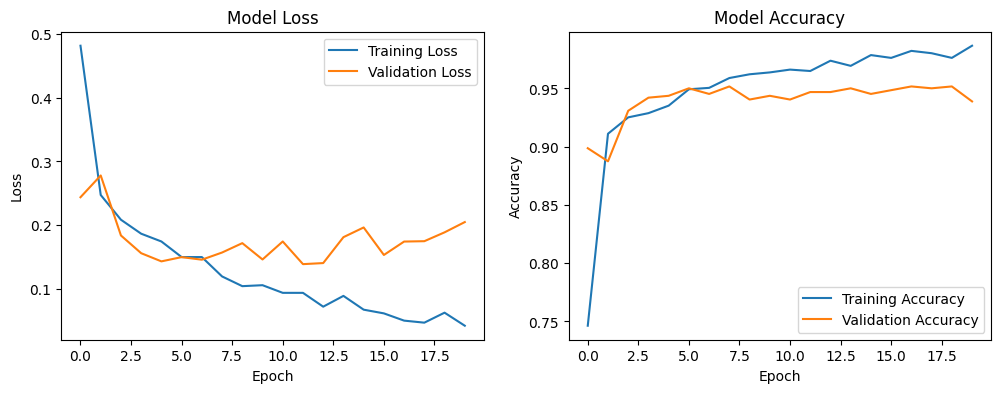

In [54]:
# Visualize the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

evaluate

In [55]:
# tokenizer_t = AutoTokenizer.from_pretrained("vinai/phobert-base")
# model_t = AutoModel.from_pretrained("vinai/phobert-base")

In [56]:
# def generate_sentence_embedding_t(text):
#     # Tokenize the text
#     input_ids = tokenizer_t.encode(text, add_special_tokens=True, max_length=256, truncation=True, padding='max_length')

#     # Convert input_ids to a PyTorch tensor
#     input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

#     # Generate the embedding
#     with torch.no_grad():
#         outputs = model_t(input_ids)
#         embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

#     return embedding

In [60]:
test_data['Compound_VN_Content'] = test_data['Content'].apply(tokenize_text)
test_data['preprocess_SW'] = test_data.apply(lambda row: preprocess(row['Compound_VN_Content'], stopwords), axis=1)
test_data['Content_embedding'] = test_data['preprocess_SW'].apply(lambda content: generate_sentence_embedding(content))

In [63]:
x_test = np.array([np.array(train) for train in test_data['Content_embedding']])

In [65]:
loss, accuracy = model_cnn.evaluate(x_test, test_data['Label'])

25/25 [==============================] - 1s 31ms/step - loss: 0.2100 - accuracy: 0.9409


In [66]:
print(accuracy)
print(loss)

0.9408740401268005
0.21001794934272766
